## Use Scikit-learn to train a Multiple Linear Regression model

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd 

data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 4, 6, 8, 10],
    'Target': [3, 6, 9, 12, 15]
})

X = data[['Feature1', 'Feature2']]
Y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Predictions:", model.predict(X_test))

Coefficients: [0.6 1.2]
Intercept: -3.552713678800501e-15
Predictions: [6.]


## Implement Gradient Descent for Linear Regression

In [5]:
import numpy as np 

def gradient_function(X, y , learning_rate = 0.001, iterations = 1000):
    n_sample, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0 
    
    for _ in range(iterations):
        y_pred = np.dot(X, weights) + bias
        
        dw = (1/n_sample) * np.dot(X.T, (y_pred - y))
        db = (1/n_sample) * np.sum(y_pred-y)  
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
    
    return weights, bias

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 6, 8 ,10])

weights, bias = gradient_function(X, y)
print(weights, bias)

[1.87964642] 0.4344656480762931


## Perform Ridge and Lasso Regression using Scikit-learn and compare results

In [8]:
from sklearn.linear_model import Ridge, Lasso 

ridge = Ridge(alpha= 0.01)
lasso = Lasso(alpha = 0.01)

data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 4, 6, 8, 10],
    'Target': [3, 6, 9, 12, 15]
})

X = data[['Feature1', 'Feature2']]
Y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)

Ridge Coefficients: [0.59986289 1.19972578]
Lasso Coefficients: [0.712      1.14285714]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.424e-02, tolerance: 7.875e-03
  model = cd_fast.enet_coordinate_descent(


## Plot a Polynomial Regression curve

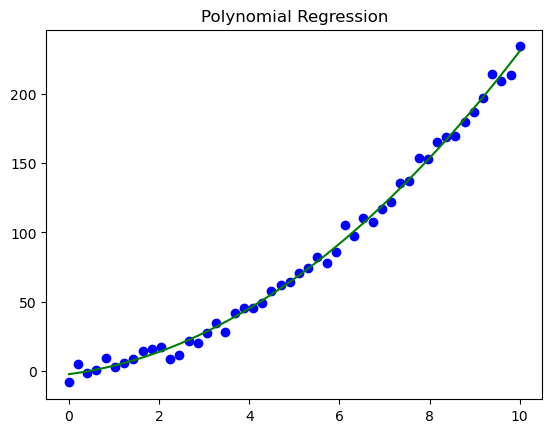

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = np.linspace(0, 10, 50).reshape(-1,1)
y = 2 * X**2 + 3 * X + np.random.randn(50, 1) * 5

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

poly_model.fit(X, y)


plt.scatter(X, y , color = 'blue')
plt.plot(X, poly_model.predict(X), color = 'green')
plt.title("Polynomial Regression")
plt.show()


## Check for multicollinearity using Variance Inflation Factor (VIF)

In [18]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 4, 6, 8, 10],
    'Feature3': [3, 6, 9, 12, 15]
}

# Convert the data into a pandas DataFrame
X = pd.DataFrame(data)

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate and print VIF
print(calculate_vif(X))


    Feature  VIF
0  Feature1  inf
1  Feature2  inf
2  Feature3  inf


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Standardize features before applying Linear Regression

In [22]:
from sklearn.preprocessing import StandardScaler

# Sample data
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 4, 6, 8, 10],
    'Feature3': [3, 6, 9, 12, 15]
}

X = pd.DataFrame(data)

def standarddata(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

print(standarddata(X))

[[-1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356]]


## Implement Cross-Validation to evaluate a regression model

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np 

data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Target': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
}
df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2']]
y = df['Target']

model = LinearRegression()

cv_scores = cross_val_score(model, X, y, cv = 2,scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))


Cross-Validation Scores: [1. 1.]
Mean R² Score: 1.0


## Detect and remove outliers in a dataset before applying regression

In [27]:
from scipy import stats
import pandas as pd
data = {
    'Feature1': [1, 2, 3, 4, 100],
    'Feature2': [2, 4, 6, 8, 2000000],
    'Target': [3, 6, 9, 12, 15]
}
df = pd.DataFrame(data)

X = df[['Feature1', 'Feature2']]
y = df['Target']

def remove_outliers(X, y , threshold = 3):
    z_scores = np.abs(stats.zscore(X))
    mask = (z_scores < threshold).all(axis = 1)
    return X[mask], y[mask]
X_clean, y_clean = remove_outliers(X, y)

print(X_clean)
print(y_clean)

   Feature1  Feature2
0         1         2
1         2         4
2         3         6
3         4         8
4       100   2000000
0     3
1     6
2     9
3    12
4    15
Name: Target, dtype: int64
